## test basic Transformation DSLs

In [1]:
from basics.ARCLOADER import *
from basics.VISUALIZATION import *

# from DSL.dsl import *
# from DSL.dsl2 import *
from DSL.dsl3 import *
# from DSL.hodel_utils import *
# from DSL.property_DSL import *
# from DSL.util_DSL import *
# from DSL.transformation_DSL import *

# from KG_definition.node import *
# from KG_definition.new import *
# from KG_definition.edge import *

# from KG_construction.construction import *

from components.components import *

In [2]:
arc = ARCDataset()
tasks, j_codes = arc.load_data(type = 'train', form = 'list_in_list', shuffle = False, jcode = True)

entire_single_components = []
task_list = []

for t in range(len(tasks)):
    ttt = TASK(tasks, t)

    entire_single_components.append(ttt)
    task_list.append(ttt)
    pair_list = []

    for p in range(len(ttt.example_pairs)):
        ppp = PAIR(ttt, t, p)

        entire_single_components.append(ppp)
        pair_list.append(ppp)

        grid_list = []

        for g in range(len(ppp.grids)):
            ggg = GRID(ppp, t, p, g)
            # print(ggg.objects)

            entire_single_components.append(ggg)
            grid_list.append(ggg)

            object_list = []

            for o in range(len(ggg.objects)):
                ooo = OBJECT(ggg, t, p, g, o)

                entire_single_components.append(ooo)
                object_list.append(ooo)

                pixel_list = []

                for x in range(len(ooo.pixels)):
                    xxx = PIXEL(ooo, t, p, g, o, x)


                    entire_single_components.append(xxx)
                    pixel_list.append(xxx)

                ooo.pixel_list = pixel_list
            ggg.object_list = object_list
        ppp.grid_list = grid_list
    ttt.pair_list = pair_list



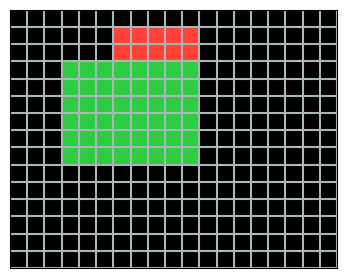

[(7, 9)]


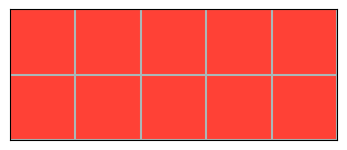

[(1, 8), (2, 8)]


In [3]:
t = 399
p = 2
g = 1
o = None
x = None

for component in entire_single_components:
    if component.id == (t, p, g, o, x):
        # print(component.type)
        # plot_data(component.view)

        example_grid = component
        example_object = component.object_list[0]
        plot_data(example_grid.view)
        print(example_grid.center)
        plot_data(example_object.view)
        print(example_object.center)
        # print(len(object_list))
        # plot_data(component.object_list[0].ancestor.view)


@@@@@@@@
((2, 2, 2, 2, 2), (2, 2, 2, 2, 2))
[(1, 8), (2, 8)] [(2, 5)]
(1.5, 8.0) (2, 5)
(3.0, 0.5)
(0.5, -3.0)
(-3.0, -0.5)
(-1.0, 4.5)
(-1, -1) (4, 5) *****
((-1, 4), (-1, 5))


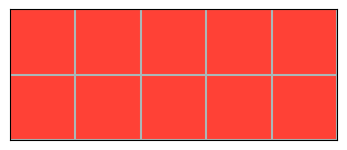

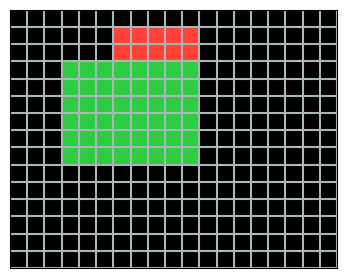

In [6]:
from DSL.transformation_DSL import *

# plot_data(coloring(example_grid, [(2,1),(2,3),(4,1),(4,3)], 4).view)
# plot_data(coloring(example_object, [(0,0),(0,1),(0,4)], 8).view)

# plot_data(color_switch(example_grid, 0, 2).view)

# print("example_grid.view")
# print(example_grid.view)

# rotated_grid = rotate(example_grid, 'cw', 1, None)
# print(rotated_grid)
# print(rotated_grid.view)
# print("#####")
# transformed_grid_1 = TRANSFORMED(rotate(example_grid, 'cw', 1, None), example_grid.id[0], example_grid.id[1], example_grid.id[2], example_grid.id[3], example_grid.id[4], prev="rotate")
# print(transformed_grid_1)

# plot_data(transformed_grid_1.view)

# plot_data(rotated_grid.view)
# example_object.view = rotate(example_object, 'ccw', 2, None)
# plot_data(example_object.view)f


print("@@@@@@@@")

# transformed_grid_a = TRANSFORMED(rotate(example_grid, 'cw', 1, None), example_grid.id[0], example_grid.id[1], example_grid.id[2], example_grid.id[3], example_grid.id[4], prev="rotate")
# plot_data(transformed_grid_a.view)
# transformed_grid_b = TRANSFORMED(rotate(example_grid, 'ccw', 1, None), example_grid.id[0], example_grid.id[1], example_grid.id[2], example_grid.id[3], example_grid.id[4], prev="rotate")
# plot_data(transformed_grid_b.view)
# transformed_grid_c = TRANSFORMED(rot90(example_grid), example_grid.id[0], example_grid.id[1], example_grid.id[2], example_grid.id[3], example_grid.id[4], prev="hori_flip")
# plot_data(transformed_grid_c.view)

# transformed_grid_d = TRANSFORMED(rotate(example_grid, 'cw', 2, None), example_grid.id[0], example_grid.id[1], example_grid.id[2], example_grid.id[3], example_grid.id[4], prev="hori_flip")
# plot_data(transformed_grid_d.view)
transformed_grid_e = TRANSFORMED(rotate(example_object, 'cw', 3, [(2,5)]), example_grid.id[0], example_grid.id[1], example_grid.id[2], example_grid.id[3], example_grid.id[4], prev="hori_flip")
plot_data(transformed_grid_e.view)
plot_data(example_object.ancestor.view)


## type definition을 시도 

In [5]:
from typing import (
    List,
    Union,
    Tuple,
    Any,
    Container,
    Callable,
    FrozenSet,
    Iterable
)

Boolean = bool
Integer = int

Color = Integer
Colors = Union[Color, List[Color]]
Coord = Tuple[Integer, Integer]
Coords = Union[Coord, List[Coord]]
Colcoord = Tuple[Color, Coord]
Colcoords = Union[Colcoord, List[Colcoord]]

Pixel = Colcoord
Pixels = Union[Pixel, List[Pixel]]
Object = List[Pixel]
Objects = Union[Object, List[Object]]
Grid_Color = List[List[Integer]]
Grid_ColCoord = List[List[Colcoord]]
Grid = Union[Grid_Color, Grid_ColCoord]
Grids = Union[Grid, List[Grid]]
Pair = List[Grid, Grid]
Pairs = Union[Pair, List[Pair]]
Task = List[Pairs]
Tasks = Union[Task, List[Task]]


# 막무가내로 type을 정의하는 것은 무리인 듯하니, Transformation, Property, Util, Relation DSL을 먼저 정의하여 이름만 작성하고 필요한 type의 목록을 작성하자. 



TypeError: Too many arguments for typing.List; actual 2, expected 1